In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

import matplotlib.pyplot as plt

In [24]:
# loading the data from csv file to a pandas dataframe

Rain_data = pd.read_csv('Rainfall-Dataset.csv')

print(Rain_data.columns)
print(Rain_data.dtypes)

Index(['temperature', 'humidity', 'dew_point', 'wind_speed', 'cloud_cover',
       'solar_radiation', 'pressure', 'visibility', 'precip'],
      dtype='object')
temperature        float64
humidity           float64
dew_point          float64
wind_speed         float64
cloud_cover        float64
solar_radiation    float64
pressure           float64
visibility         float64
precip             float64
dtype: object


In [15]:
#dropping columns with object type because it can crash the algorithm

# Rain_data = Rain_data.drop(columns=['datetime', 'preciptype'])  # Example only — use real names from above

In [16]:
# #important columns with object type will be encoded since its needed for prediction, cant be deleted.
# Rain_data['name'] = pd.factorize(Rain_data['name'])[0]
# Rain_data['sunrise'] = pd.factorize(Rain_data['sunrise'])[0]
# Rain_data['sunset'] = pd.factorize(Rain_data['sunset'])[0]
# Rain_data['conditions'] = pd.factorize(Rain_data['conditions'])[0]
# Rain_data['description'] = pd.factorize(Rain_data['description'])[0]
# Rain_data['icon'] = pd.factorize(Rain_data['icon'])[0]
# Rain_data['stations'] = pd.factorize(Rain_data['stations'])[0]

In [17]:
# printing the first 5 columns of the dataframe
R= Rain_data.head()
print(R)

# number of rows & columns in the dataframe
N= Rain_data.shape
print(N)

# checking for missing values
M= Rain_data.isnull().sum()
print(M)

   temperature  humidity  dew_point  wind_speed  cloud_cover  solar_radiation  \
0     0.004076  0.012273  -0.013319    0.021391    -0.012415        -0.020927   
1     0.000504  0.020003  -0.024422   -0.018866     0.008685         0.009663   
2    -0.051525  0.016645   0.031467   -0.001926     0.033444        -0.003696   
3     0.003197  0.019095  -0.026931   -0.012960    -0.012690         0.008956   
4     0.034360  0.008314  -0.027674   -0.054018     0.006576        -0.010632   

   pressure  visibility    precip  
0  0.016953   -0.016968  0.680906  
1 -0.031052   -0.014557  0.589892  
2  0.001665    0.023678  1.014030  
3  0.022807    0.039913  0.922540  
4 -0.011814    0.015854  0.361025  
(2000, 9)
temperature        0
humidity           0
dew_point          0
wind_speed         0
cloud_cover        0
solar_radiation    0
pressure           0
visibility         0
precip             0
dtype: int64


In [18]:
# Now extract features and labels
X = Rain_data.drop(columns=['precip']).values  # Replace with your target column name
Y = Rain_data['precip'].values

print("loook")
print(X)
print(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 2)

loook
[[ 0.00407565  0.01227336 -0.01331934 ... -0.0209272   0.01695253
  -0.01696751]
 [ 0.00050443  0.02000254 -0.02442196 ...  0.00966269 -0.03105173
  -0.01455667]
 [-0.05152519  0.01664548  0.03146746 ... -0.00369567  0.00166539
   0.02367818]
 ...
 [ 0.03472963  0.02163808 -0.0135216  ...  0.02282083 -0.00751519
  -0.00171207]
 [-0.0118329   0.01158656  0.00854858 ... -0.00769289 -0.02277086
   0.02560969]
 [ 0.01692109  0.02423488 -0.03469344 ...  0.01287204  0.01977842
  -0.01366482]]
[0.68090647 0.58989237 1.0140303  ... 0.84335546 0.86193253 1.09767813]


In [19]:
#Training the Linear Regression model

model = LinearRegression()
model.fit(X_train, Y_train)
# Printing the parameter values (weights & bias)
print('weights = ', model.coef_)   # The weights (coefficients) for each feature
print('bias = ', model.intercept_) # The bias (intercept)


weights =  [2.32423383 2.87502148 4.33232077 6.35347721 2.2908619  6.59539549
 2.33274057 4.5825062 ]
bias =  0.7948096335839119


In [20]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)


[1.07722993 0.62424776 0.51203717 0.88134206 0.2649548  0.72817176
 0.98819118 0.39222366 0.60131457 0.70420271 0.92193284 1.03286076
 0.4680212  0.87898405 0.76297373 0.56396825 0.55890247 0.41868624
 1.0781076  0.77426558 0.84469026 0.85473419 0.35283929 0.8404265
 0.71330708 0.84417259 1.28087459 0.86616847 0.72034047 0.59342379
 0.80603091 1.01230342 0.95328873 1.16167022 0.5422774  0.81109589
 0.95794294 1.13330126 0.75260832 1.02814333 0.8134055  0.83590645
 0.87742989 0.94348089 0.83487006 1.05872982 1.07387782 1.17028109
 0.91660045 0.83955821 0.97031435 1.25191836 0.95490912 0.52395686
 1.06801937 0.96483199 0.68291843 0.8100158  0.70691493 0.4255124
 0.55894059 0.91771555 0.58528972 0.96713767 0.76021902 0.55377493
 0.64097364 0.74913675 0.50896697 0.77021615 0.33022856 0.76835064
 0.68665921 0.92490961 1.04455962 1.29947944 0.84255761 0.77575234
 0.96897112 0.67252813 0.22753762 0.82756976 0.89074752 0.58047815
 0.58279761 0.68051823 0.7255321  0.6276569  0.37642986 0.545976

In [21]:

err = mean_absolute_error(Y_test, test_data_prediction)
r2score = r2_score(Y_test, test_data_prediction)
#accuracy = round(r2 * 100, 2)
acc = r2score * 2

In [22]:
print("Mean Absolute Error:", err)
print("R² Score:", r2score)
print("Accuracy (%):", acc)
print("Test Set Size:", len(Y_test))

Mean Absolute Error: 0.0302480274672396
R² Score: 0.9718218629856206
Accuracy (%): 1.9436437259712411
Test Set Size: 660


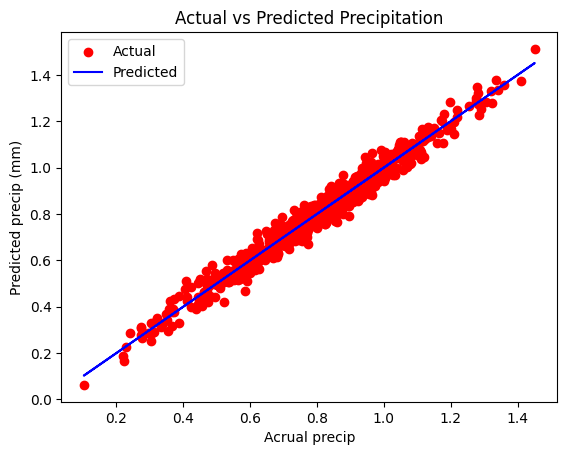

In [23]:
# plot the scatter plot
plt.scatter(Y_test, test_data_prediction, color='red', label="Actual")

# Plot the predictions
#plt.plot(X_test_feature, test_data_prediction, color='blue', label="Predicted")
plt.plot(Y_test, Y_test, color='blue', label="Predicted")

# Adding labels and title
plt.xlabel('Acrual precip')
plt.ylabel('Predicted precip (mm)')
plt.title('Actual vs Predicted Precipitation')

# Add legend
plt.legend()

# Show the plot
plt.show()
